Dataset = https://www.kaggle.com/sobhanmoosavi/us-accidents

## Part Zero - Initial Imports and Options

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
from sklearn import preprocessing

In [49]:
#accidents_original = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\US_Accidents_Dec19.csv")

In [50]:
data = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\US_Accidents_Dec19.csv")

In [51]:
pd.set_option('display.max_columns', None)

## Part One - Data Cleaning

### Data wrangling - converting objects to the correct type, dropping columns where unnessecary. 

In [52]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [53]:
data['Start_Time'].dtypes

dtype('O')

In [54]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

In [55]:
data['Start_Time'] = data['Start_Time'].dt.normalize()
data['End_Time'] = data['End_Time'].dt.normalize()

In [56]:
data['Start_Time'].dtypes

dtype('<M8[ns]')

In [57]:
data['End_Time'].dtypes

dtype('<M8[ns]')

In [58]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08,2016-02-08,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08,2016-02-08,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08,2016-02-08,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08,2016-02-08,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08,2016-02-08,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


### Select timeframe of one year. 

In [59]:
data_year = data[(data['Start_Time'] > '2016-08-23') &
                (data['Start_Time'] <= '2019-08-23')]

### Which columns have null values?

In [60]:
data_year.isnull().sum()

ID                             0
Source                         0
TMC                       530404
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1887814
End_Lng                  1887814
Distance(mi)                   0
Description                    1
Number                   1549540
Street                         0
Side                           0
City                          61
County                         0
State                          0
Zipcode                      716
Country                        0
Timezone                    2544
Airport_Code                4725
Weather_Timestamp          30560
Temperature(F)             46151
Wind_Chill(F)            1686162
Humidity(%)                48566
Pressure(in)               40530
Visibility(mi)             55057
Wind_Direction             34610
Wind_Speed(mph)           405389
Precipitat

### Drop columns that aren't needed for our study.

In [61]:
data_year = data_year.drop(columns = ['Number','End_Time','Wind_Chill(F)','Street','Timezone','Airport_Code','End_Lat','End_Lng','Pressure(in)','Humidity(%)'])

### Sort by Severity of Accident (4 = Most Severe, 1 = Least Severe)

In [62]:
data_year = data_year.sort_values(by = 'Severity', ascending = False)

In [63]:
data_year['Start_Time'].min()

Timestamp('2016-08-24 00:00:00')

### Export to CSV to reduce dataset size for easier loading with Tableau.

In [64]:
#data_year.to_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\DataYearAccidents.csv")

#### Search Descriptor Column

In [65]:
traffic_codes = data['TMC'].value_counts()
traffic_codes = pd.DataFrame(traffic_codes)
traffic_codes.reset_index()
traffic_codes.index.names = ['Code']
traffic_codes.head()

,TMC
Code,
201.0,1890037
241.0,219071
245.0,35919
229.0,22653
203.0,16792


In [66]:
event_codes = pd.read_html('https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List')

In [67]:
codes = event_codes[0].drop(columns = ['N','Q','T','D','U','C','R'])

In [68]:
codes.head()

,Code,Description
0,1,traffic problem
1,2,queuing traffic (with average speeds Q). Dange...
2,11,overheight warning system triggered
3,12,"(Q) accident(s), traffic being directed around..."
4,16,"closed, rescue and recovery work in progress"


In [69]:
df_codes = codes.merge(traffic_codes, left_on='Code', right_on='Code')
df_codes = df_codes.rename(columns = {'TMC':'# of Accidents'})

In [70]:
df_codes.sort_values(by = '# of Accidents',ascending = False)

,Code,Description,# of Accidents
1,201,(Q) accident(s),1890037
9,241,(Q) accident(s). Right lane blocked,219071
11,245,(Q) accident(s). Two lanes blocked,35919
6,229,(Q) accident(s). Slow traffic,22653
3,203,multi-vehicle accident (involving Q vehicles),16792
5,222,(Q) accident(s). Queuing traffic,12552
10,244,(Q) accident(s). Hard shoulder blocked,11163
20,406,(Q th) entry slip road closed,9467
12,246,(Q) accident(s). Three lanes blocked,6350
2,202,(Q) serious accident(s),6047


### Severity over Time

In [71]:
severity_time = data_year[['Severity','Start_Time']]
severity_time['Start_Time'] = severity_time['Start_Time'].dt.date

severity_time.head()

C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Severity,Start_Time
2814574,4,2018-02-09
2269426,4,2016-10-03
2688102,4,2018-12-25
2688103,4,2018-12-25
2688104,4,2018-12-25


In [72]:
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts()
sev_count.head()

Start_Time  Severity
2016-08-24  2           1606
            3            634
            4             74
            1              3
2016-08-25  2           1364
Name: Severity, dtype: int64

In [73]:
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts().unstack(level = 1)
sev_count.reset_index(level=0, inplace=True)
sev_count

Severity,Start_Time,1,2,3,4
0,2016-08-24,3.0,1606.0,634.0,74.0
1,2016-08-25,NaN,1364.0,652.0,62.0
2,2016-08-26,3.0,1572.0,680.0,73.0
3,2016-08-27,2.0,355.0,308.0,38.0
4,2016-08-28,2.0,326.0,298.0,61.0
...,...,...,...,...,...
1090,2019-08-19,2.0,1923.0,638.0,82.0
1091,2019-08-20,NaN,2200.0,663.0,88.0
1092,2019-08-21,NaN,2103.0,676.0,71.0
1093,2019-08-22,NaN,2168.0,734.0,81.0


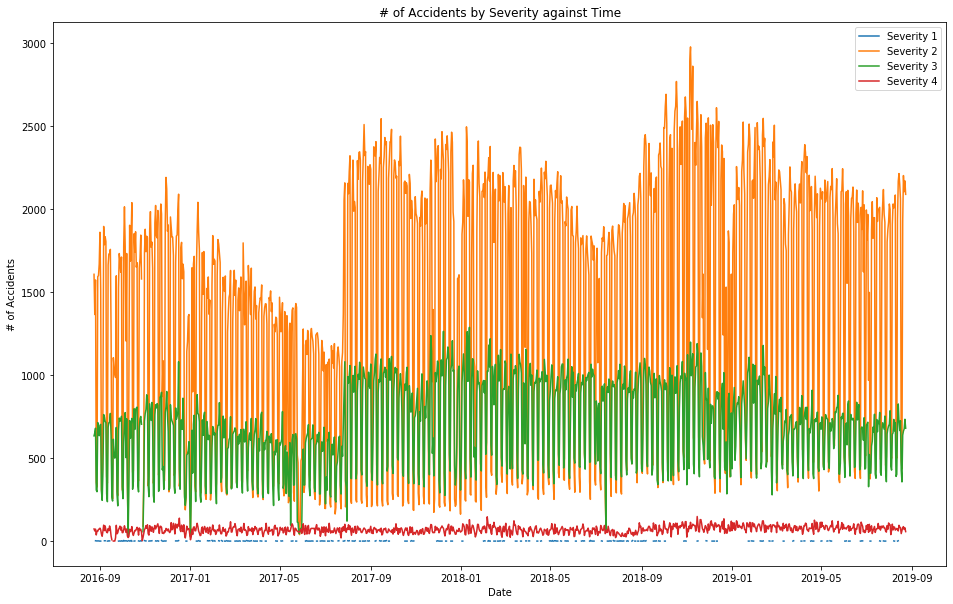

In [74]:
plt.figure(figsize=(16, 10))
plt.plot(sev_count.Start_Time, sev_count[1], label = 'Severity 1', markevery = 5)
plt.plot(sev_count.Start_Time, sev_count[2], label = 'Severity 2', markevery = 5)
plt.plot(sev_count.Start_Time, sev_count[3], label = 'Severity 3', markevery = 5)
plt.plot(sev_count.Start_Time, sev_count[4], label = 'Severity 4', markevery = 5)

plt.xlabel('Date')
plt.ylabel('# of Accidents')
plt.title('# of Accidents by Severity against Time')
plt.legend()
plt.show()

### Count Accidents By State

In [75]:
accidents_by_state = [data_year[data_year['State'] == i].count()['ID'] 
                      for i in data_year.State.unique()]

accidents_by_state.sort(reverse = True)

In [76]:
states = data_year.State.unique()

In [77]:
state_severity = data_year[['Severity', 'ID', 'State']]
state_severity

,Severity,ID,State
2814574,4,A-2814598,NY
2269426,4,A-2269450,TX
2688102,4,A-2688126,AZ
2688103,4,A-2688127,AZ
2688104,4,A-2688128,AZ
...,...,...,...
146407,1,A-146409,GA
1393931,1,A-1393947,TX
332233,1,A-332236,TX
376988,1,A-376992,OH


In [78]:
grouped = state_severity.groupby(['State']).sum().reset_index()
grouped.head()

,State,Severity
0,AL,70186
1,AR,4054
2,AZ,120689
3,CA,1107610
4,CO,85333


In [79]:
sort_grouped = grouped.sort_values(by = 'Severity', ascending = False)
sort_grouped.head()

,State,Severity
3,CA,1107610
41,TX,583689
8,FL,456193
32,NY,284274
38,SC,272430


###### Merging Sort_Grouped onto Df (used later in the notebook, in order to get full names of states into the image)

##### If it doesn't work, run the Notebook after the two next plots.

In [141]:
state_list.head()

,Long,State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [142]:
top_grouped = state_list.merge(sort_grouped, left_on='State', right_on='State')
top_grouped = top_grouped.sort_values(by = 'Severity', ascending = False)

In [143]:
top_grouped.Long = top_grouped.Long.str.replace(("[['E']]"),"")
top_grouped.head()

C:\Users\Gareth\Anaconda3\lib\site-packages\pandas\core\strings.py:713: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)


,Long,State,Severity
3,California,CA,1107610
40,Texas,TX,583689
7,Florida,FL,456193
29,New York,NY,284274
37,South Carolina,SC,272430


Text(0, 0.5, 'State')

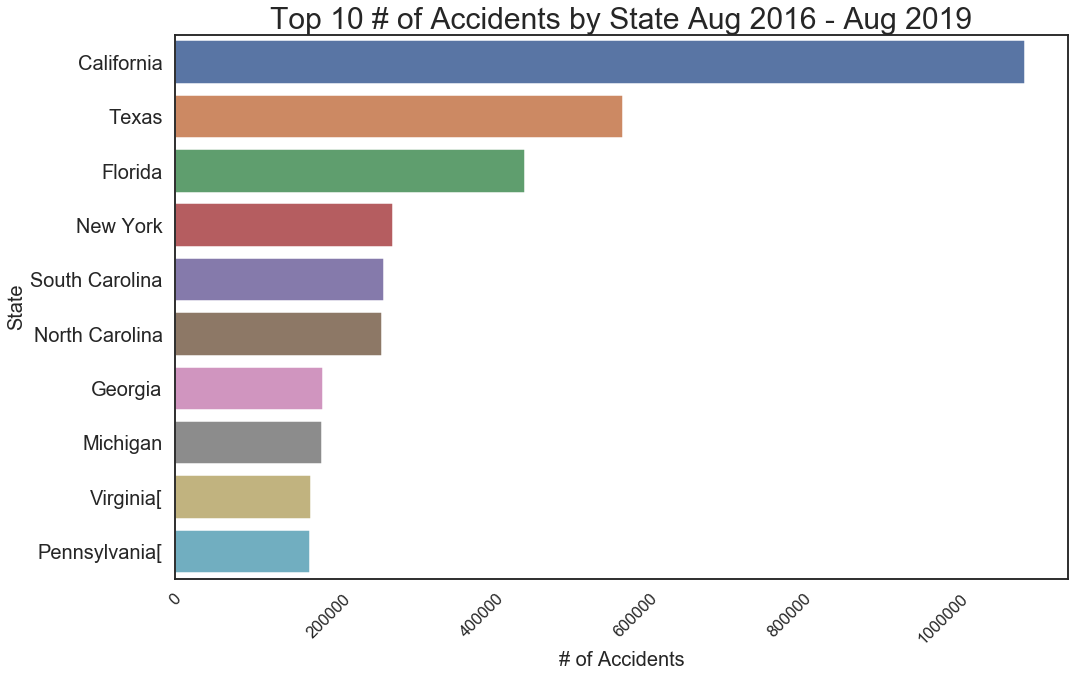

In [144]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = top_grouped['Severity'], y = top_grouped['Long'].head(10))
plt.xticks(rotation=45)
plt.yticks(fontsize = 20)
plt.title('Top 10 # of Accidents by State Aug 2016 - Aug 2019', fontsize = 30)
plt.xlabel('# of Accidents', fontsize = 20)
plt.ylabel('State', fontsize = 20)

Text(0, 0.5, 'State')

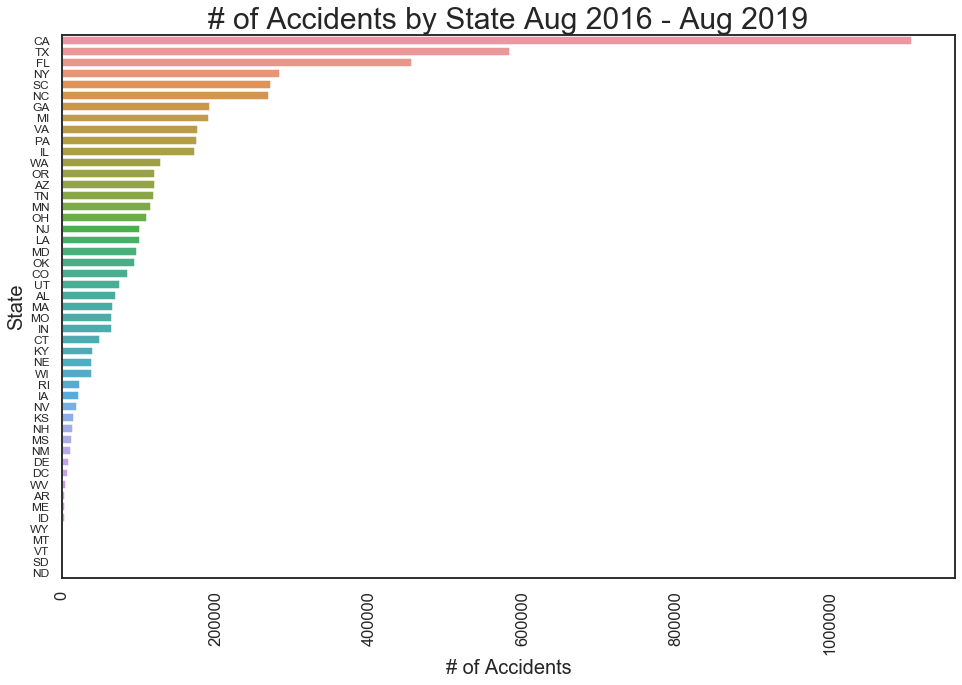

In [145]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = sort_grouped['Severity'], y = sort_grouped['State'])
plt.xticks(rotation=90)
plt.yticks(fontsize = 12)
plt.title('# of Accidents by State Aug 2016 - Aug 2019', fontsize = 30)
plt.xlabel('# of Accidents', fontsize = 20)
plt.ylabel('State', fontsize = 20)

### Severity by State

In [81]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08,2016-02-08,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08,2016-02-08,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08,2016-02-08,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08,2016-02-08,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08,2016-02-08,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [82]:
severities4_state = data[data['Severity'] == 4]['State'].value_counts()
severities3_state = data[data['Severity'] == 3]['State'].value_counts()
severities2_state = data[data['Severity'] == 2]['State'].value_counts()
severities1_state = data[data['Severity'] == 1]['State'].value_counts()

In [83]:
print('sev4 sum',severities4_state.sum())
print('sev3 sum',severities3_state.sum())
print('sev2 sum',severities2_state.sum())
print('sev1 sum',severities1_state.sum())

sev4 sum 92337
sev3 sum 887620
sev2 sum 1993410
sev1 sum 968


In [84]:
names = ['Severity 4', 'Severity 3', 'Severity 2', 'Severity 1']

In [85]:
sever_df = pd.concat([severities4_state, severities3_state,
                     severities2_state, severities1_state],
                    axis = 1)
sever_df.columns = names
sever_df.head(10)
sever_df.fillna(0)
sever_df.reset_index(inplace = True)
sever_df = sever_df.rename(columns = {'index':'State'})
sever_df = sever_df.fillna(0)
sever_df_sort = sever_df.sort_values(by = 'Severity 4', ascending = False)

In [86]:
sever_df_sort.head()

,State,Severity 4,Severity 3,Severity 2,Severity 1
0,FL,7422,71631,144622,71.0
1,GA,6595,42393,34605,27.0
2,CA,6388,211189,445381,246.0
3,NY,5421,49968,82388,22.0
4,OH,4973,17057,33817,16.0


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1152x720 with 0 Axes>

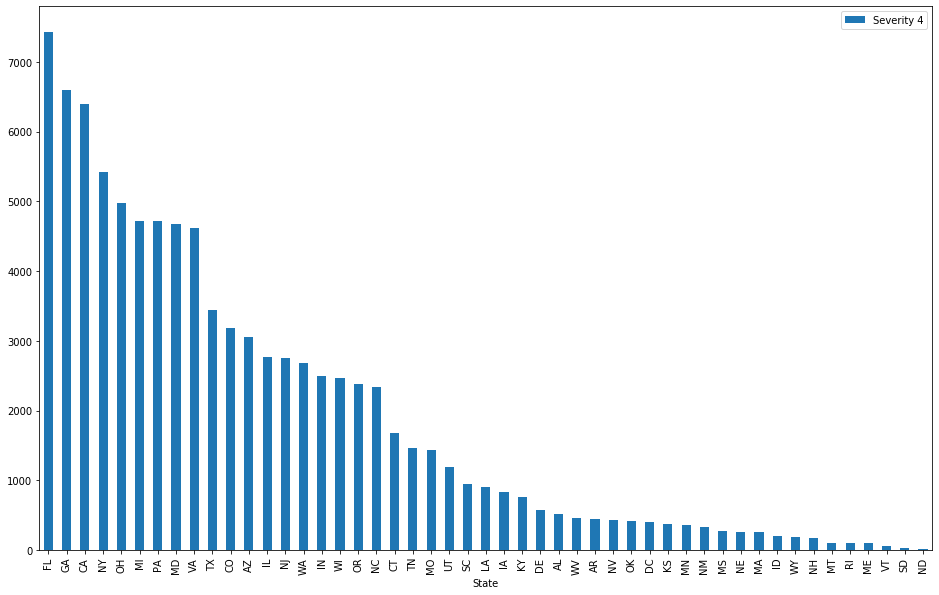

In [87]:
plt.figure(figsize=(16, 10))
ax = sever_df_sort.plot(x = 'State', y = 'Severity 4', kind = "bar", figsize = (16,10))
plt.show

In [88]:
sever_df_sort.to_csv('SeverityDatabase.csv')

### Most Common Weather Conditions during an Accident

Text(0.5, 1.0, 'Most Common Weather Conditions at the time of Accident')

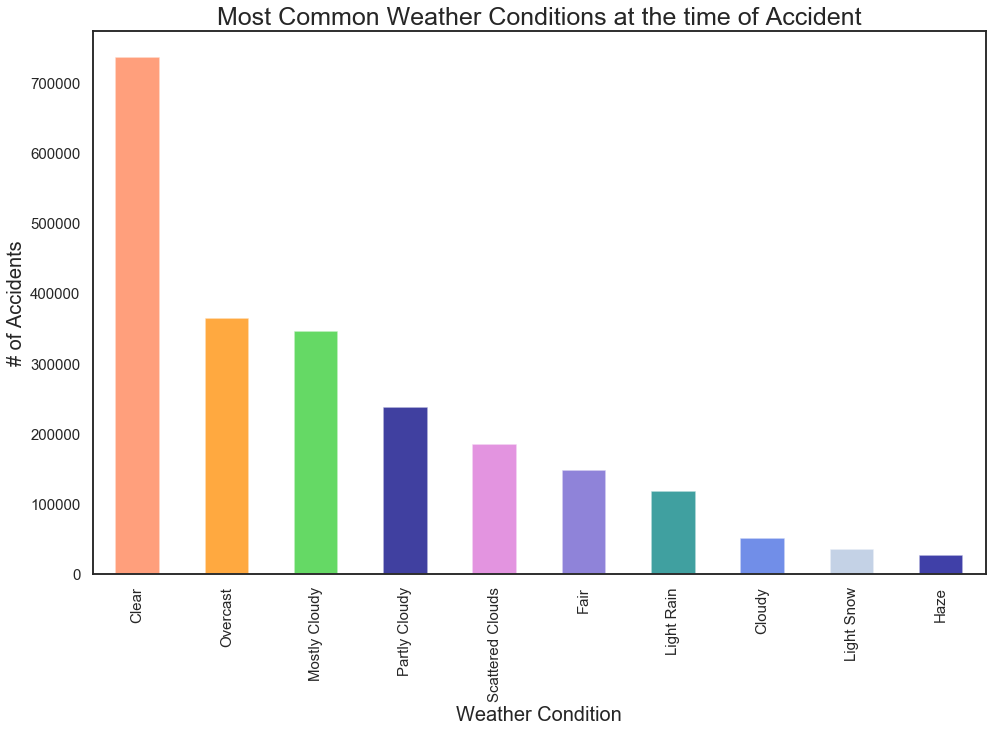

In [89]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
data_year['Weather_Condition'].value_counts().head(10).plot.bar(color = ['coral', 
                                                                         'darkorange',
                                                                         'limegreen', 
                                                                         'navy', 
                                                                         'orchid',
                                                                         'slateblue',
                                                                        'teal',
                                                                        'royalblue',
                                                                        'lightsteelblue',
                                                                        'darkblue'],
                                                               alpha = 0.75)
plt.xlabel('Weather Condition', fontsize = 20)
plt.ylabel('# of Accidents', fontsize = 20)
ax.tick_params(labelsize= 15)
plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.title('Most Common Weather Conditions at the time of Accident', fontsize = 25)

### Create columns to split Weather Conditions which contain ' / '

In [90]:
data_year['Weather_Condition 1'] = data_year['Weather_Condition'].str.split('/').str[0].str.strip()
data_year['Weather_Condition 2'] = data_year['Weather_Condition'].str.split('/').str[1].str.strip()
data_year['Weather_Condition 3'] = data_year['Weather_Condition'].str.split('/').str[2].str.strip()
#data_year['Weather_Condition 4'] = data_year['Weather_Condition'].str.split('and').str[3]
#data_year['Weather_Condition 5'] = data_year['Weather_Condition'].str.split('and').str[4]

data_year.head()

,ID,Source,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Side,City,County,State,Zipcode,Country,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
2814574,A-2814598,Bing,NaN,4,2018-02-09,42.353330,-74.070120,1.579,Closed at CR-31/Roosevelt Ave - Road closed du...,L,Cairo,Greene,NY,12413-2009,US,2018-02-09 08:51:00,9.0,10.0,Calm,NaN,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mostly Cloudy,NaN,NaN
2269426,A-2269450,Bing,NaN,4,2016-10-03,30.074080,-95.503131,0.474,Closed between FM-2920 and I-45/North Fwy - Ro...,R,Spring,Harris,TX,77388-3005,US,2016-10-03 16:53:00,84.9,10.0,Variable,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Clear,NaN,NaN
2688102,A-2688126,Bing,NaN,4,2018-12-25,33.556060,-112.112250,0.164,Ramp closed to Northern Ave/Exit 206 - Road cl...,R,Phoenix,Maricopa,AZ,85021-4857,US,2018-12-25 00:53:00,52.0,10.0,NNE,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN
2688103,A-2688127,Bing,NaN,4,2018-12-25,33.386550,-111.759640,1.968,Closed between Val Vista Dr/Exit 184 and Gilbe...,R,Mesa,Maricopa,AZ,85204,US,2018-12-25 02:54:00,50.0,10.0,NE,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN
2688104,A-2688128,Bing,NaN,4,2018-12-25,34.552714,-112.426958,0.297,Closed at Yavpe Conn - Road closed due to acci...,L,Prescott,Yavapai,AZ,86301,US,2018-12-25 19:53:00,35.1,9.0,SW,9.2,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Clear,NaN,NaN


#### Check to see if it's worked...

In [91]:
data_year.loc[data_year['Weather_Condition'] == 'Sand / Dust Whirlwinds / Windy']

,ID,Source,TMC,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Side,City,County,State,Zipcode,Country,Weather_Timestamp,Temperature(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
796576,A-796585,MapQuest,201.0,2,2019-07-11,33.379162,-111.753967,0.0,Accident on Baseline Rd at Val Vista Dr.,R,Gilbert,Maricopa,AZ,85234,US,2019-07-11 17:50:00,109.0,10.0,WNW,24.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy
796573,A-796582,MapQuest,201.0,2,2019-07-11,33.553162,-112.151573,0.0,Accident on 43rd Ave at Northern Ave.,L,Glendale,Maricopa,AZ,85302-6601,US,2019-07-11 16:58:00,111.0,10.0,WSW,22.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy


### Splitting Weather Conditions + Severity into New DF

In [92]:
df_unmerged = data_year[['Severity',
                         'Weather_Condition 1',
                         'Weather_Condition 2',
                         'Weather_Condition 3']]

df_unmerged 

,Severity,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
2814574,4,Mostly Cloudy,NaN,NaN
2269426,4,Clear,NaN,NaN
2688102,4,Clear,NaN,NaN
2688103,4,Clear,NaN,NaN
2688104,4,Clear,NaN,NaN
...,...,...,...,...
146407,1,Clear,NaN,NaN
1393931,1,Light Thunderstorms and Rain,NaN,NaN
332233,1,Clear,NaN,NaN
376988,1,Mostly Cloudy,NaN,NaN


In [93]:
df_unmerged = df_unmerged.loc[df_unmerged['Weather_Condition 1'].notna()]

In [94]:
df_unmerged.shape

(2362759, 4)

In [95]:
df_unmerged.isna().sum()

Severity                     0
Weather_Condition 1          0
Weather_Condition 2    2356874
Weather_Condition 3    2362756
dtype: int64

In [96]:
df_unmerged.drop(columns = ['Weather_Condition 2', 'Weather_Condition 3'], inplace = True)

C:\Users\Gareth\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Export to CSV as previous methods are resource intensive. 

In [97]:
#df_unmerged.to_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\Database\Dummies_Data.csv")

### Creating Dummies for Correlation

In [98]:
dummies = pd.get_dummies(df_unmerged)
dummies.head()

,Severity,Weather_Condition 1_Blowing Dust,Weather_Condition 1_Blowing Snow,Weather_Condition 1_Clear,Weather_Condition 1_Cloudy,Weather_Condition 1_Drizzle,Weather_Condition 1_Drizzle and Fog,Weather_Condition 1_Dust Whirls,Weather_Condition 1_Fair,Weather_Condition 1_Fog,Weather_Condition 1_Freezing Rain,Weather_Condition 1_Funnel Cloud,Weather_Condition 1_Hail,Weather_Condition 1_Haze,Weather_Condition 1_Heavy Blowing Snow,Weather_Condition 1_Heavy Drizzle,Weather_Condition 1_Heavy Freezing Drizzle,Weather_Condition 1_Heavy Freezing Rain,Weather_Condition 1_Heavy Ice Pellets,Weather_Condition 1_Heavy Rain,Weather_Condition 1_Heavy Rain Showers,Weather_Condition 1_Heavy Smoke,Weather_Condition 1_Heavy Snow,Weather_Condition 1_Heavy Snow with Thunder,Weather_Condition 1_Heavy T-Storm,Weather_Condition 1_Heavy Thunderstorms and Rain,Weather_Condition 1_Heavy Thunderstorms and Snow,Weather_Condition 1_Heavy Thunderstorms with Small Hail,Weather_Condition 1_Ice Pellets,Weather_Condition 1_Light Blowing Snow,Weather_Condition 1_Light Drizzle,Weather_Condition 1_Light Fog,Weather_Condition 1_Light Freezing Drizzle,Weather_Condition 1_Light Freezing Fog,Weather_Condition 1_Light Freezing Rain,Weather_Condition 1_Light Hail,Weather_Condition 1_Light Haze,Weather_Condition 1_Light Ice Pellets,Weather_Condition 1_Light Rain,Weather_Condition 1_Light Rain Shower,Weather_Condition 1_Light Rain Showers,Weather_Condition 1_Light Rain with Thunder,Weather_Condition 1_Light Snow,Weather_Condition 1_Light Snow Grains,Weather_Condition 1_Light Snow Showers,Weather_Condition 1_Light Snow and Sleet,Weather_Condition 1_Light Snow with Thunder,Weather_Condition 1_Light Thunderstorm,Weather_Condition 1_Light Thunderstorms and Rain,Weather_Condition 1_Light Thunderstorms and Snow,Weather_Condition 1_Low Drifting Snow,Weather_Condition 1_Mist,Weather_Condition 1_Mostly Cloudy,Weather_Condition 1_N,Weather_Condition 1_Overcast,Weather_Condition 1_Partly Cloudy,Weather_Condition 1_Patches of Fog,Weather_Condition 1_Rain,Weather_Condition 1_Rain Shower,Weather_Condition 1_Rain Showers,Weather_Condition 1_Sand,Weather_Condition 1_Scattered Clouds,Weather_Condition 1_Shallow Fog,Weather_Condition 1_Showers in the Vicinity,Weather_Condition 1_Small Hail,Weather_Condition 1_Smoke,Weather_Condition 1_Snow,Weather_Condition 1_Snow Grains,Weather_Condition 1_Snow Showers,Weather_Condition 1_Snow and Sleet,Weather_Condition 1_Snow and Thunder,Weather_Condition 1_Squalls,Weather_Condition 1_T-Storm,Weather_Condition 1_Thunder,Weather_Condition 1_Thunder and Hail,Weather_Condition 1_Thunder in the Vicinity,Weather_Condition 1_Thunderstorm,Weather_Condition 1_Thunderstorms and Rain,Weather_Condition 1_Thunderstorms and Snow,Weather_Condition 1_Tornado,Weather_Condition 1_Volcanic Ash,Weather_Condition 1_Widespread Dust,Weather_Condition 1_Wintry Mix
2814574,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2269426,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2688102,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2688103,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2688104,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
pd.DataFrame(dummies.sum().sort_values(ascending = False))

,0
Severity,5612529
Weather_Condition 1_Clear,737102
Weather_Condition 1_Overcast,365212
Weather_Condition 1_Mostly Cloudy,348138
Weather_Condition 1_Partly Cloudy,238348
...,...
Weather_Condition 1_Dust Whirls,1
Weather_Condition 1_Freezing Rain,1
Weather_Condition 1_Snow and Thunder,1
Weather_Condition 1_Heavy Smoke,1


In [100]:
dummies['Severity'].corr(dummies['Weather_Condition 1_Clear'])

-0.010620256102224272

### Finding High (> 0.01 or <0.01) Correlation

In [101]:
columns = list(dummies.columns)
columns.remove('Severity')

correlation_values = []
weather_types = []

for column in columns:
    corr = dummies['Severity'].corr(dummies[column])
    if corr >= 0.01 or corr <= -0.01:
        print(f'The correlation for {column} = {corr}')
        print('------------------------------------------------------')
        weather_types.append(column)
        correlation_values.append(corr)


The correlation for Weather_Condition 1_Clear = -0.010620256102224272
------------------------------------------------------
The correlation for Weather_Condition 1_Fair = -0.019425413302361846
------------------------------------------------------
The correlation for Weather_Condition 1_Light Freezing Rain = 0.01086585905570625
------------------------------------------------------
The correlation for Weather_Condition 1_Light Rain = 0.01062488178079427
------------------------------------------------------
The correlation for Weather_Condition 1_Light Snow = 0.025837266016054863
------------------------------------------------------
The correlation for Weather_Condition 1_Rain = 0.010703213163315359
------------------------------------------------------
The correlation for Weather_Condition 1_Snow = 0.010952443777723924
------------------------------------------------------


In [102]:
weather_types = [item.replace('Weather_Condition 1_','') for item in weather_types]

Text(0, 0.5, 'Correlation')

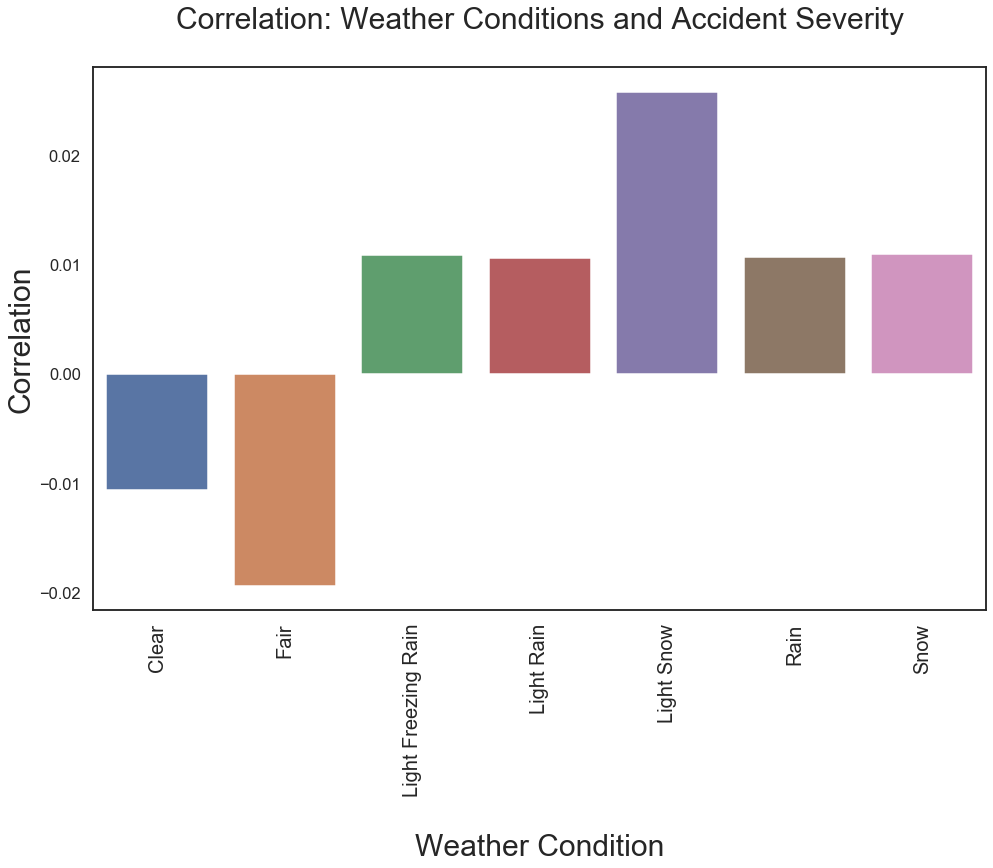

In [103]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = weather_types, y = correlation_values)
plt.xticks(rotation=90)
plt.title('Correlation: Weather Conditions and Accident Severity\n', fontsize = 30)
plt.xlabel('\nWeather Condition', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('Correlation', fontsize = 30)

### Severity Visualization

In [104]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08,2016-02-08,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08,2016-02-08,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08,2016-02-08,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08,2016-02-08,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08,2016-02-08,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [105]:
severities4 = data[data['Severity'] == 4]['Severity'].value_counts()
severities3 = data[data['Severity'] == 3]['Severity'].value_counts()
severities2 = data[data['Severity'] == 2]['Severity'].value_counts()
severities1 = data[data['Severity'] == 1]['Severity'].value_counts()
severity_df = pd.concat([severities4, severities3, severities2, severities1]).reset_index()
severity_df = pd.DataFrame(severity_df)
severity_df = severity_df.rename(columns = {'index':'Severity','Severity':'Counts'})
severity_df

,Severity,Counts
0,4,92337
1,3,887620
2,2,1993410
3,1,968


Text(0, 0.5, '# of Accidents')

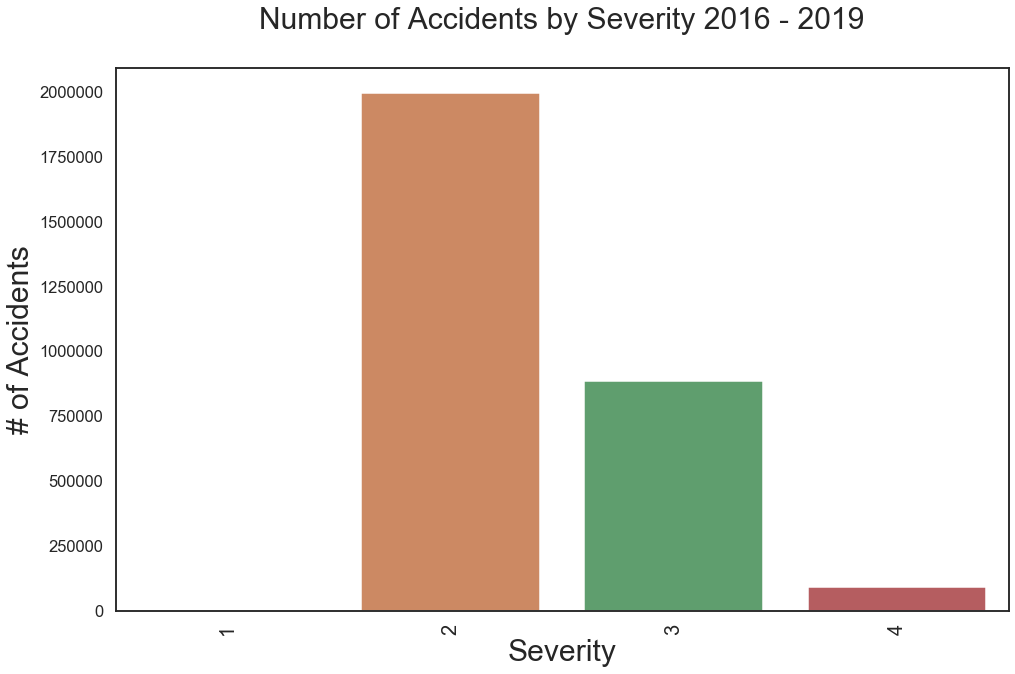

In [106]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = severity_df.Severity, y = severity_df.Counts)
plt.xticks(rotation=90)
plt.title('Number of Accidents by Severity 2016 - 2019\n', fontsize = 30)
plt.xlabel('Severity', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('# of Accidents', fontsize = 30)

### WebScraping

In [107]:
url = 'https://en.wikipedia.org/wiki/Seat_belt_laws_in_the_United_States'
wiki = requests.get(url).content
wikisoup = BeautifulSoup(wiki, 'html.parser')
my_table = wikisoup.find('table',{'class':'wikitable sortable'})
my_table_info = my_table.findAll('a')
my_table_info
table = []

for value in my_table:
    for i in my_table.findAll('td'):
        table.append(i.text.strip())

seatbelts = pd.DataFrame(table)

In [108]:
seatbelts.head()

,0
0,Alabama
1,Primary Enforcement
2,"July 18, 1991"
3,Age 15+ in front seats
4,$25


### No need to WebScrape, use Panda's read_html instead!

In [109]:
df = pd.read_html('https://en.wikipedia.org/wiki/Seat_belt_laws_in_the_United_States')[0]
df.columns

Index(['State, federal district, or territory', 'Type of law',
       'Date of first law', 'Who is covered', 'Base fine before fees',
       'Seat Belt Usage (2017)[7][note 2]'],
      dtype='object')

In [110]:
stateabbr = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')[0]
stateabbr.head()

Flag, name &postal abbreviation[12]                                        \
  Flag, name &postal abbreviation[12] Flag, name &postal abbreviation[12].1   
0                             Alabama                                    AL   
1                              Alaska                                    AK   
2                             Arizona                                    AZ   
3                            Arkansas                                    AR   
4                          California                                    CA   

        Cities              Ratificationor admission[C] Population[D][14]  \
       Capital  Largest[16] Ratificationor admission[C] Population[D][14]   
0   Montgomery   Birmingham                Dec 14, 1819           4903185   
1       Juneau    Anchorage                 Jan 3, 1959            731545   
2      Phoenix      Phoenix                Feb 14, 1912           7278717   
3  Little Rock  Little Rock                Jun 15, 1836           3017804   
4   Sacramento  Los Angeles                 Sep 9, 1850          39512223   

  Total area[15]          Land area[15]          Water area[15]          \
             mi2      km2           mi2      km2            mi2     km2   
0          52420   135767         50645   131171           1775    4597   
1         665384  1723337        570641  1477953          94743  245384   
2         113990   295234        113594   294207            396    1026   
3          53179   137732         52035   134771           1143    2961   
4         163695   423967        155779   403466           7916   20501   

  Numberof Reps.  
  Numberof Reps.  
0              7  
1              1  
2              9  
3              4  
4             53

In [111]:
state_list = stateabbr.values
state_list = pd.DataFrame(state_list)
state_list = state_list[[0,1]]
state_list = state_list.rename(columns = {0:'Long',1:'State'})
state_list.head()

,Long,State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [112]:
df.head()

,"State, federal district, or territory",Type of law,Date of first law,Who is covered,Base fine before fees,Seat Belt Usage (2017)[7][note 2]
0,Alabama,Primary Enforcement,"July 18, 1991",Age 15+ in front seats,$25,92.9%
1,Alaska,Primary Enforcement,"September 12, 1990",Age 16+ in all seats,$15 ($25 actual),90.1%
2,American Samoa,Primary Enforcement[4],?,All ages in front seats[8],$25[8],84.9%
3,Arizona,Secondary Enforcement,"January 1, 1991",Age 8+ in front seats; Age 8–15 in all seats,$10 ($37.20 actual),86.1%
4,Arkansas,Primary Enforcement,"July 15, 1991",Age 15+ in front seats,$25,81.0%


In [113]:
df = df.drop(['Type of law','Date of first law','Who is covered','Base fine before fees'], axis = 1)

In [114]:
df = df.rename(columns = {'State, federal district, or territory':'State','Seat Belt Usage (2017)[7][note 2]':'Seatbelt'})

In [115]:
df = df.drop(52) ### Wake Island has no data.

In [116]:
df.sort_values(by = 'Seatbelt', ascending = False).head()

,State,Seatbelt
11,Georgia,97.1%
13,Hawaii,96.9%
40,Oregon,96.8%
5,California,96.2%
53,Washington,94.8%


In [117]:
sort_grouped.head()

,State,Severity
3,CA,1107610
41,TX,583689
8,FL,456193
32,NY,284274
38,SC,272430


In [118]:
df_states = sort_grouped.merge(state_list, left_on='State', right_on='State')
df_states = df_states.rename(columns = {'State':'Abbv','Long':'State'})
df_states.head()

,Abbv,Severity,State
0,CA,1107610,California
1,TX,583689,Texas
2,FL,456193,Florida
3,NY,284274,New York
4,SC,272430,South Carolina


In [119]:
df_states_full = df_states.merge(df, left_on = 'State', right_on='State')
df_states_full = df_states_full[['Abbv','State','Severity','Seatbelt']]
df_states_full['Seatbelt'] = df_states_full['Seatbelt'].str.replace('%','')
df_states_full.sort_values(by = 'Severity', ascending = False).head()

,Abbv,State,Severity,Seatbelt
0,CA,California,1107610,96.2
1,TX,Texas,583689,91.9
2,FL,Florida,456193,90.2
3,NY,New York,284274,93.4
4,SC,South Carolina,272430,92.3


In [120]:
df_states_full.Seatbelt = df_states_full.Seatbelt.astype(str).astype(float)

In [121]:
df_states_full.dtypes

Abbv         object
State        object
Severity      int64
Seatbelt    float64
dtype: object

[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Seatbelt Useage (%)')]

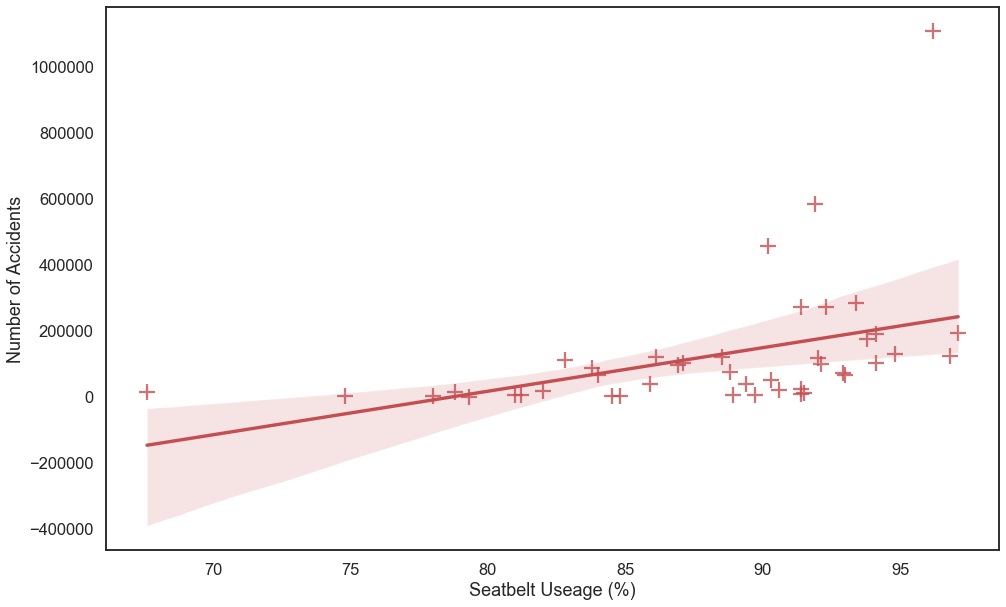

In [122]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
x = df_states_full['Seatbelt']
y = df_states_full['Severity']
ax = sns.regplot(x, y, 
                  data = df_states_full, scatter_kws = {"s": 250},
                  marker = "+", color = 'r')
ax.set(xlabel = "Seatbelt Useage (%)", ylabel = "Number of Accidents")

In [123]:
result = stats.linregress(x, y)

print("Slope: ", result.slope)
print("Intercept: ", result.intercept)
print("rvalue: ", result.rvalue)
print("pvalue: ", result.pvalue)
print("stderr: ", result.stderr)

Slope:  13215.363956424482
Intercept:  -1041044.4801827433
rvalue:  0.42411500654096795
pvalue:  0.004592594591738942
stderr:  4407.009358314533


#### Normalising

In [124]:
min_max_scaler = preprocessing.MinMaxScaler()

In [125]:
x = df_states_full[['Severity']]
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_states_full['Normalized'] = df_normalized
df_states_full.head()

,Abbv,State,Severity,Seatbelt,Normalized
0,CA,California,1107610,96.2,1.000000
1,TX,Texas,583689,91.9,0.526932
2,FL,Florida,456193,90.2,0.411811
3,NY,New York,284274,93.4,0.256579
4,SC,South Carolina,272430,92.3,0.245884


[Text(0, 0.5, 'Number of Accidents Normalized'),
 Text(0.5, 0, 'Seatbelt Useage (%)')]

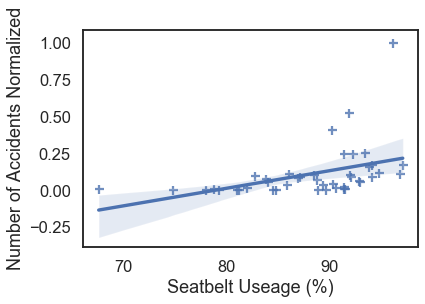

In [126]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots()
x = df_states_full['Seatbelt']
y = df_states_full['Normalized']
ax = sns.regplot(x, y, 
                  data = df_states_full,
                  marker = "+")
ax.set(xlabel = "Seatbelt Useage (%)", ylabel = "Number of Accidents Normalized")

##### Without Outliers

In [127]:
df_states_nooutlier = df_states_full.drop([0, 1, 2])
df_states_nooutlier.head()
df_states_nooutlier.Seatbelt = df_states_full.Seatbelt.astype(str).astype(float)

[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Seatbelt Useage (%)')]

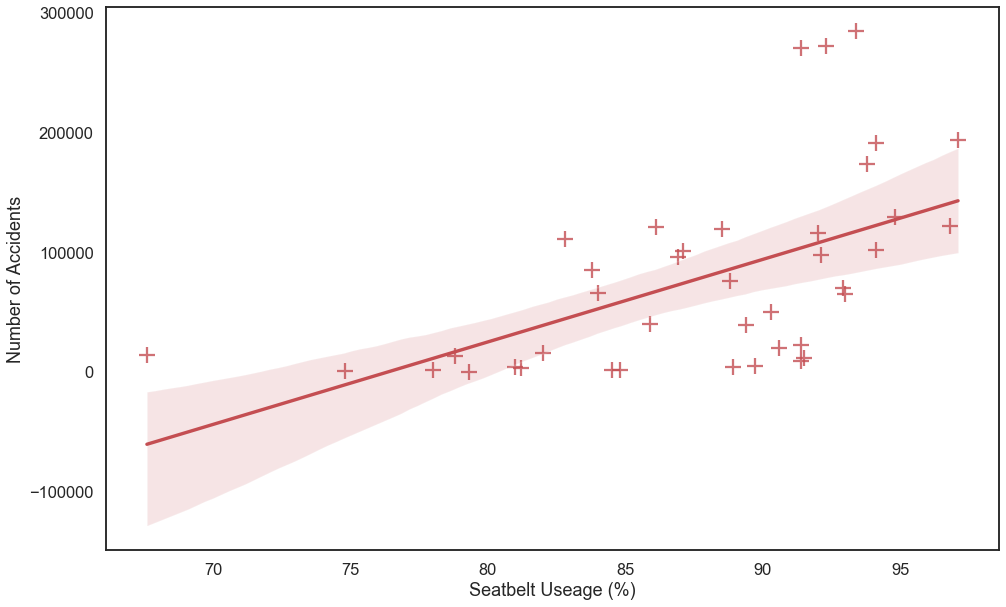

In [128]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
x = df_states_nooutlier['Seatbelt']
y = df_states_nooutlier['Severity']
ax = sns.regplot(x, y, 
                  data = df_states_nooutlier,
                  scatter_kws = {"s": 250},
                  marker = "+", color = 'r')
ax.set(xlabel = "Seatbelt Useage (%)", ylabel = "Number of Accidents")

In [129]:
result = stats.linregress(x, y)

print("Slope: ", result.slope)
print("Intercept: ", result.intercept)
print("rvalue: ", result.rvalue)
print("pvalue: ", result.pvalue)
print("stderr: ", result.stderr)

Slope:  6896.106765537881
Intercept:  -526839.1454016197
rvalue:  0.5495825452483445
pvalue:  0.00023966141802435494
stderr:  1700.5688167819071


### Hypothesis Testing

#### Hypothesis : The Average Severity of Car Accidents in the USA is above 2.5

In [130]:
st, p_value =  stats.ttest_1samp(data['Severity'], 2.5)

In [131]:
st

-445.30320440188416

In [132]:
p_value

0.0

In [133]:
data['Severity'].mean()

2.360190092911525

##### Reject hypothesis : doesn't really work because the variance of the data is very low.

#### Hypothesis, the average distance that an accident affects the road would be one mile. 

In [134]:
st, p_value =  stats.ttest_1samp(data['Distance(mi)'], 1)

In [135]:
print(st, p_value)

-795.7497672553656 0.0


In [136]:
data['Distance(mi)'].mean()

0.2855653569462776

##### Reject hypothesis, average accident distance is less than one mile

---------------

#### Hypothesis: Severities of Four result in accidents that are 1.4 miles long.

In [137]:
data.loc[data.Severity == 4]['Distance(mi)'].mean()

1.7015939767430726

In [138]:
st, p_value =  stats.ttest_1samp(data.loc[data.Severity == 4]['Distance(mi)'], 1.4)

In [139]:
print(st, p_value)

24.766460401466276 5.701732427349463e-135


##### Hypothesis can be rejected

### DUI Rates

In [140]:
DUI = pd.read_html('https://backgroundchecks.org/which-states-have-the-worst-dui-problems.html')
DUI[0]

,Rank,State,DUI Arrests,DUI Arrest Rate (per 100K),DUI Fatalities,Rate of Total Traffic Deaths,DUI Fatalities Increase/Decrease over Prior Year,DUI Death Rate (per 100K),DUI Severity Score
0,1,Wyoming,3432,676.10,34,30%,-26.10%,5.89,12.65
1,2,South Dakota,5891,721.93,45,35%,25%,5.10,12.32
2,3,Montana,3794,381.24,79,43%,38.60%,7.44,11.25
3,4,North Dakota,5136,678.35,29,27%,-38.30%,3.82,10.60
4,5,Mississippi,5370,462.21,163,25%,6.50%,5.46,10.08
5,6,New Mexico,6464,459.67,108,28%,-4.40%,5.15,9.75
6,7,North Carolina,27915,518.82,421,29%,5%,4.05,9.24
7,8,South Carolina,15188,344.48,291,28%,-4.60%,5.72,9.17
8,9,Alaska,3148,429.03,29,36%,31.80%,3.93,8.22
9,10,Wisconsin,24368,425.26,199,34%,5.30%,3.42,7.68
